In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pytorch-tabnet

     -------------------------------------- 161.9/161.9 MB 8.2 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping

# from lightgbm import LGBMRegressor
# import random
# import xgboost as xgb
from pytorch_tabnet.tab_model import TabNetRegressor

In [3]:
curr_dir = os.getcwd()
curr_dir

'C:\\weather\\uv'

In [4]:
forders_tr = os.listdir(curr_dir+"\\data\\"+"\\outlier_train_val")
forders_tr

['2001_uv_nooutlier.csv',
 '2002_uv_nooutlier.csv',
 '2003_uv_nooutlier.csv',
 '2004_uv_nooutlier.csv',
 '2005_uv_nooutlier.csv',
 '2006_uv_nooutlier.csv',
 '2007_uv_nooutlier.csv',
 '2008_uv_nooutlier.csv',
 '2009_uv_nooutlier.csv',
 '2010_uv_nooutlier.csv',
 '2011_uv_nooutlier.csv',
 '2012_uv_nooutlier.csv',
 '2101_uv_nooutlier.csv',
 '2102_uv_nooutlier.csv',
 '2103_uv_nooutlier.csv',
 '2104_uv_nooutlier.csv',
 '2105_uv_nooutlier.csv',
 '2106_uv_nooutlier.csv',
 '2107_uv_nooutlier.csv',
 '2108_uv_nooutlier.csv',
 '2109_uv_nooutlier.csv',
 '2110_uv_nooutlier.csv',
 '2111_uv_nooutlier.csv',
 '2112_uv_nooutlier.csv']

In [5]:
summer_tr = forders_tr[4:10] + forders_tr[12+4:12+10-3]
summer_tr

summer_val = forders_tr[12+10-3:12+10]
summer_val

['2108_uv_nooutlier.csv', '2109_uv_nooutlier.csv', '2110_uv_nooutlier.csv']

In [6]:
train = pd.DataFrame()

for files in summer_tr:
    df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+files)
    train = pd.concat([train, df])
    
train.drop('idx', axis=1, inplace=True)
train

yyyymmdd  hhnn  stn        lon       lat   uv    band1    band2  \
0      20200501     0   13  126.16000  33.30000  0.0  0.00000 -0.00057   
1      20200501     0  105  128.89098  37.75147  0.0 -0.00057 -0.00057   
2      20200501     0  108  126.96500  37.57100  0.0  0.00000  0.00000   
3      20200501     0  112  126.62490  37.47772  0.0  0.00000  0.00000   
4      20200501     0  115  130.89864  37.48129  0.0  0.00000  0.00000   
...         ...   ...  ...        ...       ...  ...      ...      ...   
65607  20210731  2350  146  127.11900  35.84080  0.1  0.00000 -0.00057   
65608  20210731  2350  152  129.33472  35.58250  0.0  0.00000  0.00000   
65609  20210731  2350  156  126.89158  35.17294  0.0 -0.00057  0.00000   
65610  20210731  2350  159  129.03203  35.10468  0.0  0.00000  0.00000   
65611  20210731  2350  165  126.38121  34.81689  0.0  0.00000  0.00000   

         band3    band4  ...     band12     band13     band14     band15  \
0     -0.00030  0.00165  ...  252.91737  277.63245  277.03649  275.67037   
1     -0.00060 -0.00090  ...  256.69212  286.82011  287.23821  285.51819   
2      0.00000  0.00090  ...  253.85590  281.28558  281.42512  280.03692   
3      0.00089  0.00030  ...  254.78101  283.03827  283.39275  282.06360   
4      0.00030  0.00075  ...  251.68704  277.82840  278.25056  275.71853   
...        ...      ...  ...        ...        ...        ...        ...   
65607  0.00030 -0.00060  ...  264.53165  291.90287  290.09587  285.48855   
65608  0.00000 -0.00030  ...  262.88449  288.27382  286.67481  282.45891   
65609  0.00000  0.00015  ...  262.57588  287.50208  284.96722  280.05240   
65610 -0.00119  0.00000  ...  262.22936  287.43410  286.66069  283.63739   
65611  0.00000 -0.00135  ...  258.04647  280.29423  277.57615  272.99021   

          band16    solarza    sateza      esr  height  landtype  
0      262.71147  130.35092  38.96359 -6.11462   71.00         0  
1      269.40510  126.43187  43.95463 -5.60867   26.04         3  
2      266.81080  126.31564  43.77999 -5.59822   85.50         3  
3      268.05385  126.36437  43.67046 -5.60546   68.99         3  
4      262.56565  126.91833  43.74521 -5.66707  222.80         4  
...          ...        ...       ...      ...     ...       ...  
65607  270.82702  124.36364  41.81018 -4.72602   62.90         3  
65608  269.23268  125.09137  41.52495 -4.87156   82.00         2  
65609  267.56515  124.95628  41.04849 -4.79509   72.38         3  
65610  270.60537  125.49764  40.96396 -4.91507   69.56         3  
65611  263.16598  125.16440  40.67788 -4.80919   38.00         3  

[578938 rows x 27 columns]

In [7]:
# 인덱스 맞추기
train = train.reset_index()
train = train.drop('index',axis=1)
train

yyyymmdd  hhnn  stn        lon       lat   uv    band1    band2  \
0       20200501     0   13  126.16000  33.30000  0.0  0.00000 -0.00057   
1       20200501     0  105  128.89098  37.75147  0.0 -0.00057 -0.00057   
2       20200501     0  108  126.96500  37.57100  0.0  0.00000  0.00000   
3       20200501     0  112  126.62490  37.47772  0.0  0.00000  0.00000   
4       20200501     0  115  130.89864  37.48129  0.0  0.00000  0.00000   
...          ...   ...  ...        ...       ...  ...      ...      ...   
578933  20210731  2350  146  127.11900  35.84080  0.1  0.00000 -0.00057   
578934  20210731  2350  152  129.33472  35.58250  0.0  0.00000  0.00000   
578935  20210731  2350  156  126.89158  35.17294  0.0 -0.00057  0.00000   
578936  20210731  2350  159  129.03203  35.10468  0.0  0.00000  0.00000   
578937  20210731  2350  165  126.38121  34.81689  0.0  0.00000  0.00000   

          band3    band4  ...     band12     band13     band14     band15  \
0      -0.00030  0.00165  ...  252.91737  277.63245  277.03649  275.67037   
1      -0.00060 -0.00090  ...  256.69212  286.82011  287.23821  285.51819   
2       0.00000  0.00090  ...  253.85590  281.28558  281.42512  280.03692   
3       0.00089  0.00030  ...  254.78101  283.03827  283.39275  282.06360   
4       0.00030  0.00075  ...  251.68704  277.82840  278.25056  275.71853   
...         ...      ...  ...        ...        ...        ...        ...   
578933  0.00030 -0.00060  ...  264.53165  291.90287  290.09587  285.48855   
578934  0.00000 -0.00030  ...  262.88449  288.27382  286.67481  282.45891   
578935  0.00000  0.00015  ...  262.57588  287.50208  284.96722  280.05240   
578936 -0.00119  0.00000  ...  262.22936  287.43410  286.66069  283.63739   
578937  0.00000 -0.00135  ...  258.04647  280.29423  277.57615  272.99021   

           band16    solarza    sateza      esr  height  landtype  
0       262.71147  130.35092  38.96359 -6.11462   71.00         0  
1       269.40510  126.43187  43.95463 -5.60867   26.04         3  
2       266.81080  126.31564  43.77999 -5.59822   85.50         3  
3       268.05385  126.36437  43.67046 -5.60546   68.99         3  
4       262.56565  126.91833  43.74521 -5.66707  222.80         4  
...           ...        ...       ...      ...     ...       ...  
578933  270.82702  124.36364  41.81018 -4.72602   62.90         3  
578934  269.23268  125.09137  41.52495 -4.87156   82.00         2  
578935  267.56515  124.95628  41.04849 -4.79509   72.38         3  
578936  270.60537  125.49764  40.96396 -4.91507   69.56         3  
578937  263.16598  125.16440  40.67788 -4.80919   38.00         3  

[578938 rows x 27 columns]

In [8]:
ratio=[]
num = []
for i in range(len(train.columns)):
    ratio.append(len(train[train[train.columns[i]] == -999.0])/len(train))
    num.append(len(train[train[train.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [9]:
val = pd.DataFrame()

for files in summer_val:
    df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+files)
    val = pd.concat([val, df])
    
val.drop('idx', axis=1, inplace=True)
val

yyyymmdd  hhnn  stn        lon       lat   uv    band1    band2  \
0      20210801     0   13  126.16000  33.30000  0.0  0.00000 -0.00057   
1      20210801     0  105  128.89098  37.75147  0.0 -0.00057 -0.00057   
2      20210801     0  108  126.96500  37.57100  0.0  0.00000  0.00057   
3      20210801     0  112  126.62490  37.47772  0.0  0.00000  0.00000   
4      20210801     0  115  130.89864  37.48129  0.0  0.00000  0.00000   
...         ...   ...  ...        ...       ...  ...      ...      ...   
62893  20211031  2350  146  127.11900  35.84080  0.1  0.00000 -0.00057   
62894  20211031  2350  152  129.33472  35.58250  0.0  0.00000  0.00000   
62895  20211031  2350  156  126.89158  35.17294  0.0  0.00057  0.00000   
62896  20211031  2350  159  129.03203  35.10468  0.0  0.00057  0.00000   
62897  20211031  2350  165  126.38121  34.81689  0.0  0.00057  0.00057   

         band3    band4  ...     band12     band13     band14     band15  \
0      0.00089 -0.00015  ...  264.44311  290.55389  288.92546  284.67080   
1      0.00000 -0.00015  ...  259.14507  283.10942  282.76528  280.43877   
2     -0.00119  0.00120  ...  252.93837  273.65182  270.18990  267.15459   
3     -0.00030 -0.00060  ...  250.27920  268.14394  268.04466  266.56403   
4      0.00000 -0.00015  ...  263.38986  289.67998  288.05013  284.04277   
...        ...      ...  ...        ...        ...        ...        ...   
62893  0.00030 -0.00015  ...  243.98668  261.95199  261.21896  259.29863   
62894 -0.00089  0.00120  ...  255.89419  281.48837  281.57322  280.00595   
62895  0.00000  0.00015  ...  246.57815  265.43902  264.76641  262.60697   
62896 -0.00179 -0.00060  ...  257.75436  284.11394  283.85736  280.96228   
62897  0.00000  0.00075  ...  242.23513  257.66947  256.61992  254.82634   

          band16    solarza    sateza      esr  height  landtype  
0      270.70772  127.16116  38.96359 -5.60122   71.00         0  
1      268.61000  123.36327  43.95463 -5.09260   26.04         3  
2      258.99048  123.18739  43.77999 -5.07447   85.50         3  
3      259.34748  123.22507  43.67046 -5.08058   68.99         3  
4      269.26719  123.91259  43.74521 -5.16058  222.80         4  
...          ...        ...       ...      ...     ...       ...  
62893  250.50021  157.14313  41.81018 -8.56636   62.90         3  
62894  265.73255  157.99342  41.52495 -8.67521   82.00         2  
62895  252.65714  157.69250  41.04849 -8.59148   72.38         3  
62896  265.34129  158.37811  40.96396 -8.68840   69.56         3  
62897  246.85021  157.84044  40.67788 -8.58617   38.00         3  

[191832 rows x 27 columns]

In [10]:
val = val.reset_index()
val = val.drop('index',axis=1)
val

yyyymmdd  hhnn  stn        lon       lat   uv    band1    band2  \
0       20210801     0   13  126.16000  33.30000  0.0  0.00000 -0.00057   
1       20210801     0  105  128.89098  37.75147  0.0 -0.00057 -0.00057   
2       20210801     0  108  126.96500  37.57100  0.0  0.00000  0.00057   
3       20210801     0  112  126.62490  37.47772  0.0  0.00000  0.00000   
4       20210801     0  115  130.89864  37.48129  0.0  0.00000  0.00000   
...          ...   ...  ...        ...       ...  ...      ...      ...   
191827  20211031  2350  146  127.11900  35.84080  0.1  0.00000 -0.00057   
191828  20211031  2350  152  129.33472  35.58250  0.0  0.00000  0.00000   
191829  20211031  2350  156  126.89158  35.17294  0.0  0.00057  0.00000   
191830  20211031  2350  159  129.03203  35.10468  0.0  0.00057  0.00000   
191831  20211031  2350  165  126.38121  34.81689  0.0  0.00057  0.00057   

          band3    band4  ...     band12     band13     band14     band15  \
0       0.00089 -0.00015  ...  264.44311  290.55389  288.92546  284.67080   
1       0.00000 -0.00015  ...  259.14507  283.10942  282.76528  280.43877   
2      -0.00119  0.00120  ...  252.93837  273.65182  270.18990  267.15459   
3      -0.00030 -0.00060  ...  250.27920  268.14394  268.04466  266.56403   
4       0.00000 -0.00015  ...  263.38986  289.67998  288.05013  284.04277   
...         ...      ...  ...        ...        ...        ...        ...   
191827  0.00030 -0.00015  ...  243.98668  261.95199  261.21896  259.29863   
191828 -0.00089  0.00120  ...  255.89419  281.48837  281.57322  280.00595   
191829  0.00000  0.00015  ...  246.57815  265.43902  264.76641  262.60697   
191830 -0.00179 -0.00060  ...  257.75436  284.11394  283.85736  280.96228   
191831  0.00000  0.00075  ...  242.23513  257.66947  256.61992  254.82634   

           band16    solarza    sateza      esr  height  landtype  
0       270.70772  127.16116  38.96359 -5.60122   71.00         0  
1       268.61000  123.36327  43.95463 -5.09260   26.04         3  
2       258.99048  123.18739  43.77999 -5.07447   85.50         3  
3       259.34748  123.22507  43.67046 -5.08058   68.99         3  
4       269.26719  123.91259  43.74521 -5.16058  222.80         4  
...           ...        ...       ...      ...     ...       ...  
191827  250.50021  157.14313  41.81018 -8.56636   62.90         3  
191828  265.73255  157.99342  41.52495 -8.67521   82.00         2  
191829  252.65714  157.69250  41.04849 -8.59148   72.38         3  
191830  265.34129  158.37811  40.96396 -8.68840   69.56         3  
191831  246.85021  157.84044  40.67788 -8.58617   38.00         3  

[191832 rows x 27 columns]

In [11]:
ratio=[]
num = []
for i in range(len(val.columns)):
    ratio.append(len(val[val[val.columns[i]] == -999.0])/len(val))
    num.append(len(val[val[val.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [12]:
forders_te = os.listdir(curr_dir+"\\data\\"+"\\test")
forders_te

df = pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\test\\")+forders_te[0])
d = list(df.columns)
for j in range(1,len(d)):
    d[j] = d[j].replace("202206_uv.", "")
df.columns = d
df.drop('Unnamed: 0', axis=1, inplace=True)
test = df
test

yyyymmdd  hhnn  stn        lon       lat  uv    band1    band2  \
0      20220601     0   13  126.16000  33.30000 NaN  0.00000  0.00000   
1      20220601     0  105  128.89098  37.75147 NaN -0.00057 -0.00057   
2      20220601     0  108  126.96500  37.57100 NaN  0.00000 -0.00057   
3      20220601     0  112  126.62490  37.47772 NaN  0.00000  0.00000   
4      20220601     0  115  130.89864  37.48129 NaN  0.00000  0.00000   
...         ...   ...  ...        ...       ...  ..      ...      ...   
51850  20220625     0  146  127.11900  35.84080 NaN  0.00000 -0.00057   
51851  20220625     0  152  129.33472  35.58250 NaN -0.00057  0.00000   
51852  20220625     0  156  126.89158  35.17294 NaN  0.00000  0.00000   
51853  20220625     0  159  129.03203  35.10468 NaN  0.00000  0.00057   
51854  20220625     0  165  126.38121  34.81689 NaN  0.00000  0.00000   

         band3    band4  ...     band12     band13     band14     band15  \
0     -0.00060  0.00060  ...  241.07130  251.49092  250.11913  248.78686   
1      0.00000 -0.00030  ...  244.35010  262.71227  261.14580  257.52658   
2     -0.00030  0.00045  ...  249.24111  271.81756  270.25616  266.99858   
3      0.00060  0.00045  ...  249.94977  273.52547  272.33661  269.12853   
4      0.00089 -0.00030  ...  239.88321  253.29031  251.46606  249.01625   
...        ...      ...  ...        ...        ...        ...        ...   
51850 -0.00089  0.00015  ...  258.49191  286.87485  287.19605  285.48855   
51851 -0.00030 -0.00030  ...  263.99872  293.32422  293.51096  291.15861   
51852  0.00089 -0.00030  ...  261.53112  290.14436  290.23278  288.05655   
51853  0.00030 -0.00075  ...  260.95627  287.80066  287.63090  285.01340   
51854 -0.00060 -0.00015  ...  261.66027  290.07815  290.39686  288.57862   

          band16  solarza    sateza  esr  height  landtype  
0      243.12601     -999  38.96359 -999   71.00         0  
1      246.95577     -999  43.95463 -999   26.04         3  
2      254.94651     -999  43.77999 -999   85.50         3  
3      256.15036     -999  43.67046 -999   68.99         3  
4      240.92761     -999  43.74521 -999  222.80         4  
...          ...      ...       ...  ...     ...       ...  
51850  271.35400     -999  41.81018 -999   62.90         3  
51851  274.60342     -999  41.52495 -999   82.00         2  
51852  273.15633     -999  41.04849 -999   72.38         3  
51853  270.36623     -999  40.96396 -999   69.56         3  
51854  273.52379     -999  40.67788 -999   38.00         3  

[51855 rows x 27 columns]

In [13]:
ratio=[]
num = []
for i in range(len(test.columns)):
    ratio.append(len(test[test[test.columns[i]] == -999.0])/len(test))
    num.append(len(test[test[test.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0]

In [14]:
train.columns

Index(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'band1', 'band2',
       'band3', 'band4', 'band5', 'band6', 'band7', 'band8', 'band9', 'band10',
       'band11', 'band12', 'band13', 'band14', 'band15', 'band16', 'solarza',
       'sateza', 'esr', 'height', 'landtype'],
      dtype='object')

# Model

In [15]:
####### 만드는 중

In [16]:
# max_depth = 5
# n_estimators = 5000             # 400  #1000
# lr = 0.01                     # 0.017
# num_leaves = 31
# early_stopping_rounds = 300      # 100
# verbose = True                  # True

In [ ]:
# train_solarza
X_train_solarza1 = train.drop(columns = ['solarza','esr','uv'])  
X_train_solarza = X_train_solarza1.to_numpy()

X_val_solarza1 = val.drop(columns = ['solarza','esr','uv'])
X_val_solarza = X_val_solarza1.to_numpy()

X_test_solarza1 = test.drop(columns = ['solarza','esr','uv'])
X_test_solarza = X_test_solarza1.to_numpy()

y_train_solarza=train['solarza'].to_numpy().reshape(-1,1)
y_val_solarza=val['solarza'].to_numpy().reshape(-1,1)



regressor1 = TabNetRegressor(verbose=True,seed=42)
regressor1.fit(X_train=X_train_solarza, y_train=y_train_solarza,
          eval_set=[(X_val_solarza, y_val_solarza)],
          patience=300, max_epochs=2000,
          eval_metric=['mse'])          # loss가 train_mse이고 val_0_mse가 val_mse인지?
    
    


# 예측한 solarza를 train set과 검증 셋에 동시에 넣어야 함.
prediction_train = regressor1.predict(X_train_solarza)
X_train_solarza1['solarza'] = prediction_train   # 예측은 numpy형태로 하되, 열로 넣을 땐 데이터 프레임 형태에 넣기.
    
prediction_val = regressor1.predict(X_val_solarza)
X_val_solarza1['solarza'] = prediction_val

prediction = regressor1.predict(X_test_solarza)
X_test_solarza1['solarza'] = prediction

Device used : cpu
epoch 0  | loss: 733.66655| val_0_mse: 631.94648|  0:00:33s
epoch 1  | loss: 47.13991| val_0_mse: 165.63987|  0:01:05s
epoch 2  | loss: 19.00209| val_0_mse: 244.01492|  0:01:37s
epoch 3  | loss: 14.64595| val_0_mse: 222.14599|  0:02:10s
epoch 4  | loss: 13.83925| val_0_mse: 195.37178|  0:02:45s
epoch 5  | loss: 11.20724| val_0_mse: 232.32365|  0:03:18s
epoch 6  | loss: 10.60495| val_0_mse: 284.03623|  0:03:53s
epoch 7  | loss: 10.06809| val_0_mse: 217.52238|  0:04:26s
epoch 8  | loss: 9.27679 | val_0_mse: 235.45254|  0:04:59s
epoch 9  | loss: 8.90379 | val_0_mse: 254.05812|  0:05:31s
epoch 10 | loss: 8.19674 | val_0_mse: 271.20205|  0:06:04s
epoch 11 | loss: 7.72367 | val_0_mse: 256.79724|  0:06:37s
epoch 12 | loss: 7.49541 | val_0_mse: 278.92234|  0:07:09s
epoch 13 | loss: 7.2197  | val_0_mse: 234.68969|  0:07:42s
epoch 14 | loss: 7.04771 | val_0_mse: 292.16108|  0:08:14s
epoch 15 | loss: 6.79486 | val_0_mse: 282.90057|  0:08:49s
epoch 16 | loss: 6.33454 | val_0_mse:

In [ ]:
# train_esr
X_train_esr1 = X_train_solarza1  
X_train_esr = X_train_esr1.to_numpy()

X_val_esr1 = X_val_solarza1
X_val_esr = X_val_esr1.to_numpy()

X_test_esr1 = X_test_solarza1
X_test_esr = X_test_esr1.to_numpy()

y_train_esr=train['esr'].to_numpy().reshape(-1,1)
y_val_esr=val['esr'].to_numpy().reshape(-1,1)



regressor2 = TabNetRegressor(verbose=True,seed=42)
regressor2.fit(X_train=X_train_esr, y_train=y_train_esr,
          eval_set=[(X_val_esr, y_val_esr)],
          patience=300, max_epochs=2000,
          eval_metric=['mse'])          # loss가 train_mse이고 val_0_mse가 val_mse인지?
    
    


# 예측한 solarza를 train set과 검증 셋에 동시에 넣어야 함.
prediction_train = regressor2.predict(X_train_esr)
X_train_esr1['esr'] = prediction_train
    
prediction_val = regressor2.predict(X_val_esr)
X_val_esr1['esr'] = prediction_val

prediction = regressor2.predict(X_test_esr)
X_test_esr1['esr'] = prediction

C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:2.14064
[1]	validation_0-rmse:2.11562
[2]	validation_0-rmse:2.09042
[3]	validation_0-rmse:2.06709
[4]	validation_0-rmse:2.04308
[5]	validation_0-rmse:2.01925
[6]	validation_0-rmse:1.99465
[7]	validation_0-rmse:1.97045
[8]	validation_0-rmse:1.94803
[9]	validation_0-rmse:1.92512
[10]	validation_0-rmse:1.90232
[11]	validation_0-rmse:1.87985
[12]	validation_0-rmse:1.85730
[13]	validation_0-rmse:1.83502
[14]	validation_0-rmse:1.81340
[15]	validation_0-rmse:1.79196
[16]	validation_0-rmse:1.77120
[17]	validation_0-rmse:1.74997
[18]	validation_0-rmse:1.72912
[19]	validation_0-rmse:1.70843
[20]	validation_0-rmse:1.68810
[21]	validation_0-rmse:1.66844
[22]	validation_0-rmse:1.64902
[23]	validation_0-rmse:1.62978
[24]	validation_0-rmse:1.61144
[25]	validation_0-rmse:1.59285
[26]	validation_0-rmse:1.57510
[27]	validation_0-rmse:1.55655
[28]	validation_0-rmse:1.53880
[29]	validation_0-rmse:1.52116
[30]	validation_0-rmse:1.50340
[31]	validation_0-rmse:1.48614
[32]	validation_0-

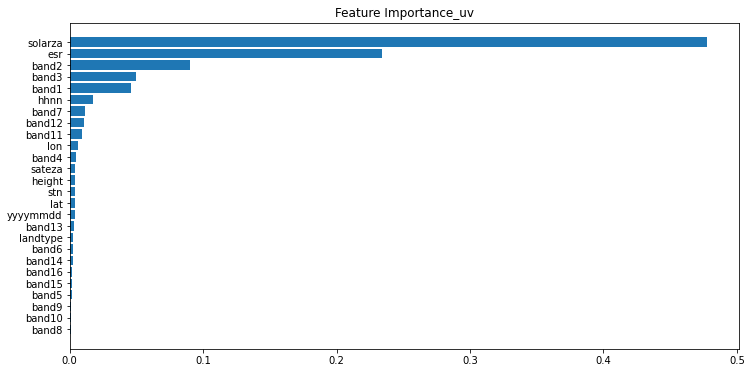

In [13]:
# train_uv
X_train_uv1 = X_train_esr1  
X_train_uv = X_train_uv1.to_numpy()

X_val_uv1 = X_val_esr1
X_val_uv = X_val_uv1.to_numpy()

X_test_uv1 = X_test_esr1
X_test_uv = X_test_uv1.to_numpy()

y_train_uv=train['uv'].to_numpy().reshape(-1,1)
y_val_uv=val['uv'].to_numpy().reshape(-1,1)



regressor3 = TabNetRegressor(verbose=True,seed=42)
regressor3.fit(X_train=X_train_uv, y_train=y_train_uv,
          eval_set=[(X_val_uv, y_val_uv)],
          patience=300, max_epochs=2000,
          eval_metric=['mse'])          # loss가 train_mse이고 val_0_mse가 val_mse인지?
    
    


# 예측한 solarza를 train set과 검증 셋에 동시에 넣어야 함.
prediction_train = regressor3.predict(X_train_uv)
X_train_uv1['uv'] = prediction_train
    
prediction_val = regressor3.predict(X_val_uv)
X_val_uv1['uv'] = prediction_val

prediction = regressor3.predict(X_test_uv)
X_test_uv1['uv'] = prediction

In [ ]:
# feature_importance = xgb_model.feature_importances_
# sorted_idx = np.argsort(feature_importance)
# fig = plt.figure(figsize=(12, 6))
# plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
# plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
# plt.title('Feature Importance')

In [16]:
pred = regressor3.predict(X_test_uv)
submission=pd.read_csv('1-1_검증데이터셋.csv', encoding='utf-8')
submission1=submission.copy()
submission1['UV'] = pred
submission1
# submission1.to_csv("220224_xgb_uv_nooutlier_trans_summer.csv", index = False)

In [17]:
submission1 

YearMonthDayHourMinute  STN        UV
0                202206010000   13  0.135486
1                202206010000  105  0.135462
2                202206010000  108  0.135464
3                202206010000  112  0.135464
4                202206010000  115  0.135464
...                       ...  ...       ...
51850            202206250000  146  0.192412
51851            202206250000  152  0.135523
51852            202206250000  156  0.135524
51853            202206250000  159  0.135523
51854            202206250000  165  0.135522

[51855 rows x 3 columns]

In [18]:
submission1['UV'].value_counts()      # 정렬해서 보기

0.135462    5461
0.135523    2757
0.135464    2731
0.135464    2727
0.135486    1409
            ... 
0.266965       1
0.245834       1
0.257125       1
0.214251       1
0.195259       1
Name: UV, Length: 31661, dtype: int64

<AxesSubplot:>

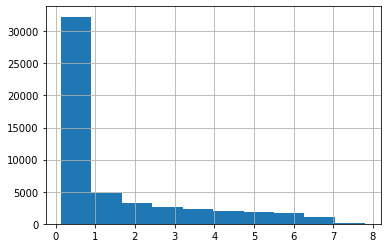

In [19]:
submission1['UV'].hist()      

In [23]:
submission1[submission1['UV']>7]

YearMonthDayHourMinute  STN        UV
1110             202206011220   13  7.048357
1198             202206011310  159  7.074493
3238             202206021150  159  7.025630
3253             202206021200  159  7.203381
3268             202206021210  159  7.206657
...                       ...  ...       ...
46588            202206221330  159  7.554382
46597            202206221340  133  7.055136
46603            202206221340  159  7.397180
46618            202206221350  159  7.231462
46633            202206221400  159  7.098872

[126 rows x 3 columns]

In [21]:
submission1[submission1['UV']<7]

YearMonthDayHourMinute  STN        UV
0                202206010000   13  0.135486
1                202206010000  105  0.135462
2                202206010000  108  0.135464
3                202206010000  112  0.135464
4                202206010000  115  0.135464
...                       ...  ...       ...
51850            202206250000  146  0.192412
51851            202206250000  152  0.135523
51852            202206250000  156  0.135524
51853            202206250000  159  0.135523
51854            202206250000  165  0.135522

[51729 rows x 3 columns]

In [24]:
xgb_model1.save_model('xgb_uv_nooutlier_trans_summer_solarza.h5')
xgb_model2.save_model('xgb_uv_nooutlier_trans_summer_esr.h5')
xgb_model3.save_model('xgb_uv_nooutlier_trans_summer_uv.h5')

In [ ]:
# 관측소별로 자외선 지수 분석할지.

In [27]:
# 비교 꼭 하고 비슷하면 낼 것.
dd = list(submission1['UV'].values)
    
pd.set_option('display.max_rows', None)
df = pd.DataFrame(dd)
df_num = pd.DataFrame(df.value_counts())
df_ratio = pd.DataFrame(df.value_counts()/len(df))
df_ = pd.concat([df_num,df_ratio],axis=1)
df_
df_.columns=['_num','_ratio']
df_

_num    _ratio
0                       
0.135462  5461  0.105313
0.135523  2757  0.053167
0.135464  2731  0.052666
0.135464  2727  0.052589
0.135486  1409  0.027172
0.135522  1382  0.026651
0.135463  1379  0.026593
0.135524  1368  0.026381
0.196559    48  0.000926
0.197149    41  0.000791
0.135485    37  0.000714
0.196115    34  0.000656
0.196705    27  0.000521
0.196639    25  0.000482
0.191719    24  0.000463
0.195988    19  0.000366
0.196496    19  0.000366
0.199790    18  0.000347
0.197975    17  0.000328
0.197087    15  0.000289
0.192078    13  0.000251
0.135486    12  0.000231
0.197030    12  0.000231
0.197143    11  0.000212
0.191767    11  0.000212
0.196356     9  0.000174
0.135482     9  0.000174
0.196843     9  0.000174
0.196551     9  0.000174
0.197530     9  0.000174
0.135792     9  0.000174
0.197912     8  0.000154
0.135539     8  0.000154
0.191700     8  0.000154
0.135579     8  0.000154
0.198634     8  0.000154
0.192141     7  0.000135
0.196964     7  0.000135
0.195398     7  0.000135
0.198440     7  0.000135
0.196195     7  0.000135
0.196800     7  0.000135
0.196252     7  0.000135
0.197668     7  0.000135
0.196440     7  0.000135
0.191963     7  0.000135
0.199642     7  0.000135
0.135546     7  0.000135
0.199453     7  0.000135
0.135479     7  0.000135
0.195860     6  0.000116
0.135601     6  0.000116
0.192641     6  0.000116
0.135756     6  0.000116
0.135727     6  0.000116
0.198891     6  0.000116
0.196739     6  0.000116
0.198963     6  0.000116
0.196983     5  0.000096
0.196883     5  0.000096
0.192151     5  0.000096
0.202008     5  0.000096
0.192026     5  0.000096
0.196484     5  0.000096
0.135749     5  0.000096
0.196557     5  0.000096
0.135581     5  0.000096
0.135756     5  0.000096
0.135581     5  0.000096
0.196040     5  0.000096
0.198500     5  0.000096
0.198043     5  0.000096
0.135481     5  0.000096
0.198132     5  0.000096
0.197873     5  0.000096
0.198838     4  0.000077
0.192412     4  0.000077
0.196723     4  0.000077
0.193064     4  0.000077
0.192279     4  0.000077
0.192101     4  0.000077
0.196631     4  0.000077
0.192193     4  0.000077
0.196576     4  0.000077
0.135470     4  0.000077
0.135629     4  0.000077
0.201137     4  0.000077
0.195311     4  0.000077
0.200031     4  0.000077
0.199522     4  0.000077
0.200280     4  0.000077
0.136171     4  0.000077
0.199727     4  0.000077
0.191888     4  0.000077
0.191787     4  0.000077
0.199357     4  0.000077
0.196321     4  0.000077
0.198492     4  0.000077
0.196333     4  0.000077
0.198581     4  0.000077
0.198918     4  0.000077
0.197536     4  0.000077
0.198766     4  0.000077
0.196392     4  0.000077
0.196219     4  0.000077
0.135515     3  0.000058
0.135427     3  0.000058
0.135511     3  0.000058
0.135750     3  0.000058
0.196809     3  0.000058
0.196774     3  0.000058
0.196185     3  0.000058
0.192932     3  0.000058
0.135484     3  0.000058
0.192749     3  0.000058
0.196428     3  0.000058
0.135755     3  0.000058
0.196297     3  0.000058
0.196680     3  0.000058
0.193116     3  0.000058
0.193210     3  0.000058
0.198988     3  0.000058
0.196342     3  0.000058
0.195478     3  0.000058
0.135457     3  0.000058
0.135570     3  0.000058
0.135447     3  0.000058
0.196439     3  0.000058
0.135769     3  0.000058
0.196872     3  0.000058
0.135627     3  0.000058
0.135650     3  0.000058
0.197808     3  0.000058
0.192236     3  0.000058
0.135648     3  0.000058
0.192216     3  0.000058
0.197280     3  0.000058
0.136403     3  0.000058
0.197142     3  0.000058
0.199836     3  0.000058
0.135634     3  0.000058
0.135583     3  0.000058
0.197286     3  0.000058
0.192265     3  0.000058
0.135633     3  0.000058
0.197817     3  0.000058
6.231130     3  0.000058
0.198555     3  0.000058
0.199322     3  0.000058
0.197651     3  0.000058
0.197021     3  0.000058
0.135629     3  0.000058
0.192164     3  0.000058
0.198611     2  0.000039
0.198433     2  0.000039
0.195231     2  0.000039
0.195373     2  0.000039
0.192581     2  0.000039
2.965716  

In [26]:
df_0621 = pd.read_csv('0621_uv_range.csv')
df_0621

Unnamed: 0  0621_num  0621_ratio
0           0.0     24582    0.405577
1           0.1      4495    0.074163
2           0.2      1690    0.027883
3           0.3      1286    0.021218
4           0.4      1222    0.020162
..          ...       ...         ...
117        11.0         3    0.000049
118        11.8         1    0.000016
119        11.9         1    0.000016
120        12.3         1    0.000016
121        12.5         1    0.000016

[122 rows x 3 columns]